https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [63]:
import matplotlib.pyplot as plt
import skimage.io as io
from pycocotools.coco import COCO

In [4]:
dataDir = 'd:\\khoi\\fourthbrain\\coco\\annotations_trainval2017'
dataType = 'val2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)

In [5]:
# initialize COCO api for instance annotations
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.95s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen animal electronic outdoor person appliance indoor food furniture vehicle sports accessory


In [11]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['car']);
imgIds = coco.getImgIds(catIds=catIds);

In [12]:
catIds

[3]

In [13]:
len(imgIds)

535

In [14]:
annIds = coco.getAnnIds(imgIds=imgIds, catIds=catIds, iscrowd=0)

In [16]:
len(annIds)

1918

In [17]:
anns = coco.loadAnns(annIds)

In [18]:
anns

[{'segmentation': [[446.65,
    301.37,
    437.02,
    302.04,
    436.02,
    301.54,
    435.35,
    297.72,
    438.34,
    296.89,
    438.68,
    294.73,
    447.15,
    294.23,
    448.81,
    298.05,
    448.48,
    301.04]],
  'area': 82.66089999999997,
  'iscrowd': 0,
  'image_id': 532481,
  'bbox': [435.35, 294.23, 13.46, 7.81],
  'category_id': 3,
  'id': 1342996},
 {'segmentation': [[447.44,
    295.96,
    448.07,
    294.22,
    455.81,
    293.91,
    457.0,
    296.04,
    459.21,
    296.83,
    459.6,
    300.22,
    456.68,
    301.56,
    453.76,
    300.77,
    448.15,
    300.85]],
  'area': 72.87609999999988,
  'iscrowd': 0,
  'image_id': 532481,
  'bbox': [447.44, 293.91, 12.16, 7.65],
  'category_id': 3,
  'id': 1347500},
 {'segmentation': [[472.26,
    299.7,
    460.59,
    300.16,
    461.05,
    292.17,
    470.88,
    291.71,
    473.34,
    292.94,
    473.03,
    296.47]],
  'area': 95.9415,
  'iscrowd': 0,
  'image_id': 532481,
  'bbox': [460.59, 291.7

In [38]:
ann = anns[0]

In [40]:
ann.keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [56]:
# get first image id
img_ids = [ann['image_id'] for ann in anns if ann['area'] > 30000 and len(ann]'segmentation') == 1]

In [72]:
len(img_ids)

56

In [73]:
img_id = img_ids[20]

In [74]:
# load image
img = coco.loadImgs(ids=[img_id])[0]

In [75]:
img

{'license': 3,
 'file_name': '000000338718.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000338718.jpg',
 'height': 445,
 'width': 500,
 'date_captured': '2013-11-17 02:03:01',
 'flickr_url': 'http://farm1.staticflickr.com/12/18425160_e4eef1d1bd_z.jpg',
 'id': 338718}

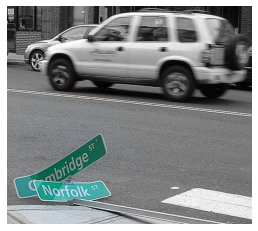

In [76]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

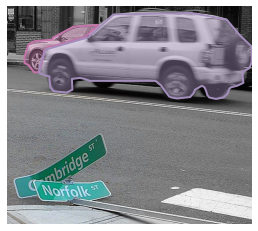

In [80]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
img_annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
img_anns = coco.loadAnns(annIds)
coco.showAnns(img_anns)

In [81]:
img_anns

[{'segmentation': [[93.0,
    63.69,
    136.0,
    40.69,
    187.0,
    37.69,
    158.0,
    62.69,
    91.0,
    81.69,
    85.0,
    81.69,
    75.0,
    90.69,
    73.0,
    104.69,
    71.0,
    114.69,
    67.0,
    125.69,
    64.0,
    132.69,
    62.0,
    134.69,
    55.0,
    134.69,
    42.0,
    118.69,
    35.0,
    115.69,
    35.0,
    102.69,
    40.0,
    87.69,
    43.0,
    77.69,
    56.0,
    70.69,
    92.0,
    67.69]],
  'area': 4117.0,
  'iscrowd': 0,
  'image_id': 338718,
  'bbox': [35.0, 37.69, 152.0, 97.0],
  'category_id': 3,
  'id': 352770},
 {'segmentation': [[121.0,
    176.0,
    94.0,
    173.0,
    88.0,
    165.0,
    86.0,
    150.0,
    86.0,
    143.0,
    78.0,
    141.0,
    66.0,
    137.0,
    66.0,
    122.0,
    78.0,
    88.0,
    165.0,
    63.0,
    217.0,
    16.0,
    376.0,
    13.0,
    448.0,
    26.0,
    476.0,
    59.0,
    500.0,
    82.0,
    500.0,
    98.0,
    500.0,
    114.0,
    495.0,
    126.0,
    482.0,
    133.0,
 

In [82]:
len(img_anns)

2